# **Import Libraries**

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from math import pi 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score,classification_report

In [2]:
earthquake_data = pd.read_csv(r"D:\RATHNA\FITA ACADEMY\Kaggle\csv_building_structure.csv")

In [3]:
earthquake_data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [4]:
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [5]:
earthquake_data.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [6]:
numerical_cols = earthquake_data.select_dtypes(include=["number"]).columns
cate_cols = earthquake_data.select_dtypes(include=["object"]).columns

In [7]:
numerical_cols

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')

In [8]:
cate_cols 

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'condition_post_eq', 'damage_grade',
       'technical_solution_proposed'],
      dtype='object')

In [9]:
earthquake_data=earthquake_data.dropna()

In [10]:
earthquake_data.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [11]:
#checking for high cardinality columns
earthquake_data.select_dtypes("object").nunique()


land_surface_condition          3
foundation_type                 5
roof_type                       3
ground_floor_type               5
other_floor_type                4
position                        4
plan_configuration             10
condition_post_eq               8
damage_grade                    5
technical_solution_proposed     4
dtype: int64

# **Exploratory Data Analysis**

# **Distribution of Damage Grade**

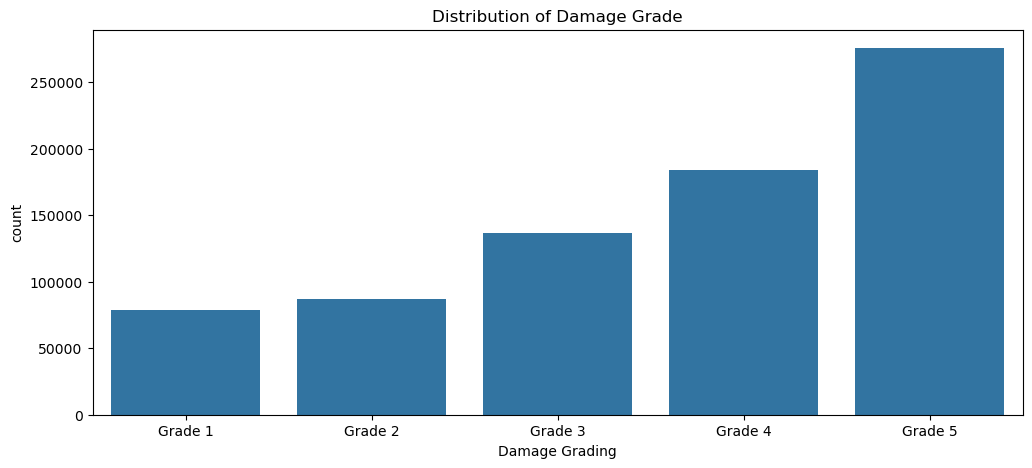

In [14]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_grade', data=earthquake_data, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()

In [15]:
earthquake_data.groupby(['district_id','damage_grade']).size().reset_index(name='count').set_index(['district_id', 'damage_grade'])

count
district_id damage_grade       
12          Grade 1        7961
            Grade 2        8605
            Grade 3        9220
            Grade 4        7946
            Grade 5        5620
20          Grade 1       13087
            Grade 2       14469
            Grade 3       17085
            Grade 4       15917
            Grade 5        8191
21          Grade 1        2116
            Grade 2        7151
            Grade 3       16945
            Grade 4       20910
            Grade 5       11490
22          Grade 1        1353
            Grade 2        2993
            Grade 3        6520
            Grade 4       14409
            Grade 5       35364
23          Grade 1        1233
            Grade 2        2009
            Grade 3        3271
            Grade 4       10796
            Grade 5       71432
24          Grade 1        8330
            Grade 2       11726
            Grade 3       25130
            Grade 4       28974
            Grade 5       23859
28          Grade 1        2615
            Grade 2        2745
            Grade 3        8209
            Grade 4       23284
            Grade 5       40295
29          Grade 1         277
            Grade 2         343
            Grade 3         782
            Grade 4        2064
            Grade 5        9178
30          Grade 1        4952
            Grade 2        7526
            Grade 3       15218
            Grade 4       26080
            Grade 5       35346
31          Grade 1       32540
            Grade 2       21135
            Grade 3       18525
            Grade 4       10928
            Grade 5        7866
36          Grade 1        4351
            Grade 2        8555
            Grade 3       15507
            Grade 4       22536
            Grade 5       27125

# **Land Surface Condition**

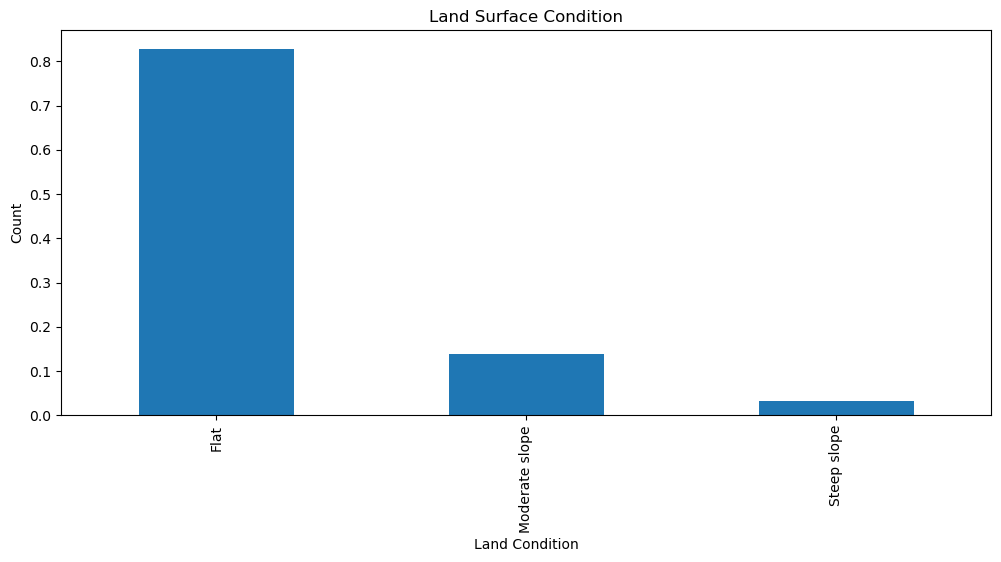

In [17]:
plt.figure(figsize=(12,5))
ax = earthquake_data.land_surface_condition.value_counts(normalize = True).plot(kind = "bar")
plt.title("Land Surface Condition")
plt.ylabel("Count")
plt.xlabel("Land Condition")
plt.show()

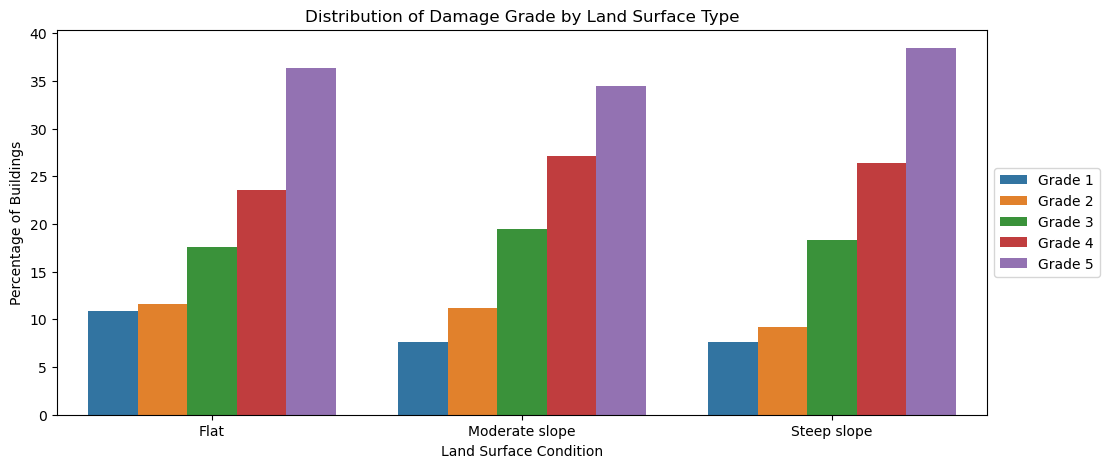

In [18]:
df_temp = earthquake_data.groupby(['land_surface_condition', 'damage_grade']).size().reset_index(name='count')
df_temp['proportion'] = df_temp.groupby('land_surface_condition')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, x='land_surface_condition', y='proportion', hue='damage_grade')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Land Surface Type")
plt.xlabel("Land Surface Condition")
plt.ylabel("Percentage of Buildings")
plt.show()

# **Foundation Type**

In [20]:
earthquake_data.foundation_type.value_counts()

foundation_type
Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: count, dtype: int64

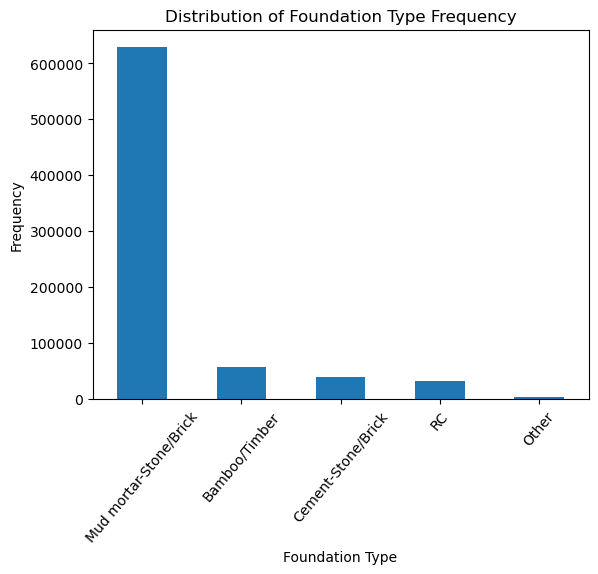

In [21]:
earthquake_data.foundation_type.value_counts().plot(kind="bar")
plt.xticks(rotation=50)
plt.title("Distribution of Foundation Type Frequency")
plt.xlabel("Foundation Type")
plt.ylabel("Frequency")
plt.show()

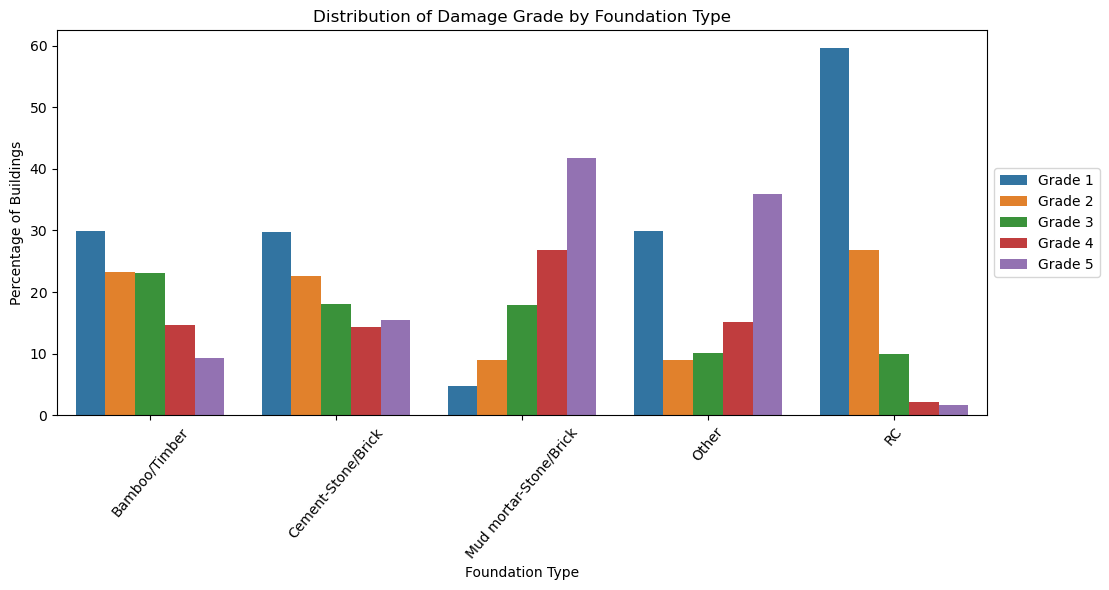

In [22]:
df_temp = earthquake_data.groupby(['foundation_type', 'damage_grade']).size().reset_index(name='count')
df_temp['proportion'] = df_temp.groupby('foundation_type')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, x='foundation_type',y='proportion',hue='damage_grade')
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Foundation Type")
plt.xlabel("Foundation Type")
plt.ylabel("Percentage of Buildings")
plt.show()

# **Roof Type**

In [24]:
earthquake_data.roof_type.value_counts()

roof_type
Bamboo/Timber-Light roof    503736
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: count, dtype: int64

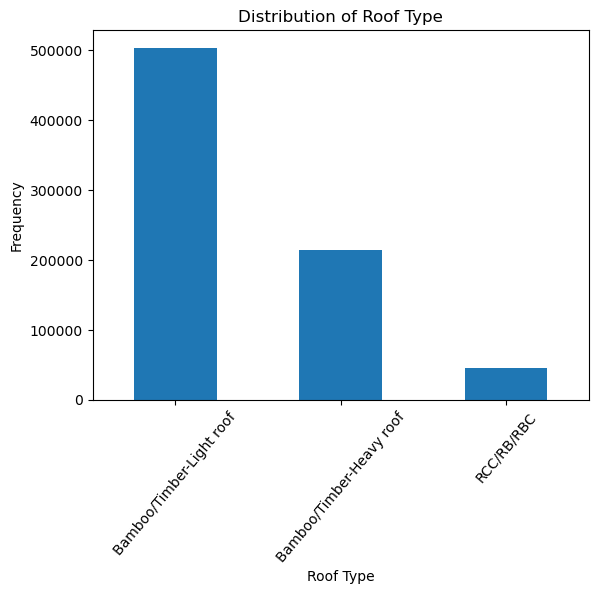

In [25]:
earthquake_data.roof_type.value_counts().plot(kind="bar")
plt.xticks(rotation=50)
plt.title("Distribution of Roof Type")
plt.xlabel("Roof Type")
plt.ylabel("Frequency")
plt.show()

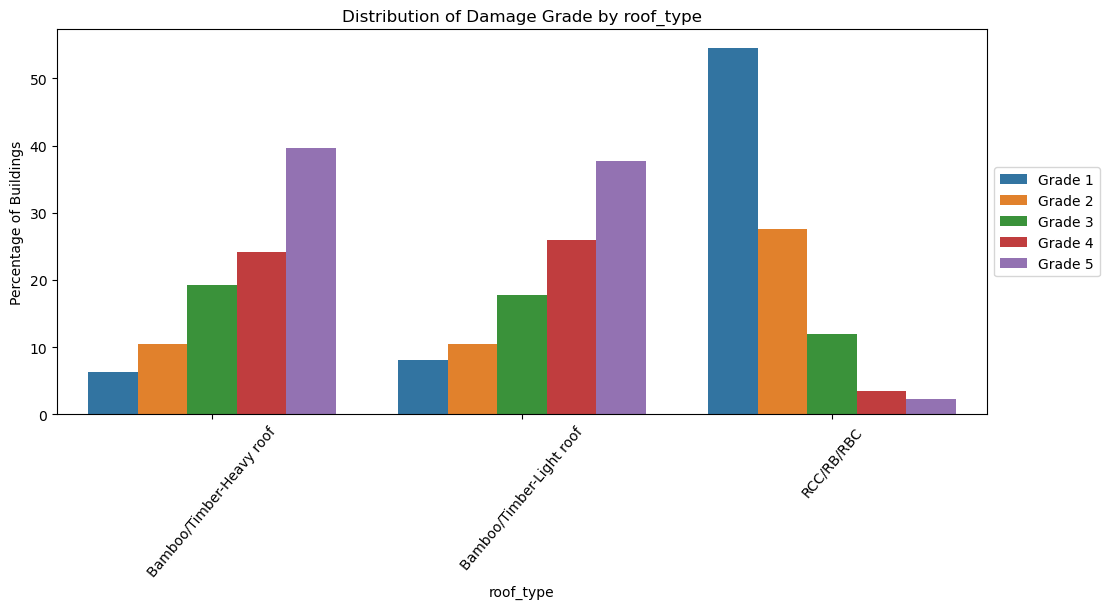

In [26]:
df_temp = earthquake_data.groupby(['roof_type', 'damage_grade']).size().reset_index(name='count')
df_temp['proportion'] = df_temp.groupby('roof_type')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, x='roof_type',y='proportion',hue='damage_grade')
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by roof_type")
plt.xlabel("roof_type")
plt.ylabel("Percentage of Buildings")
plt.show()

# **Ground Floor Type**

In [28]:
earthquake_data.ground_floor_type.value_counts()

ground_floor_type
Mud            618205
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: count, dtype: int64

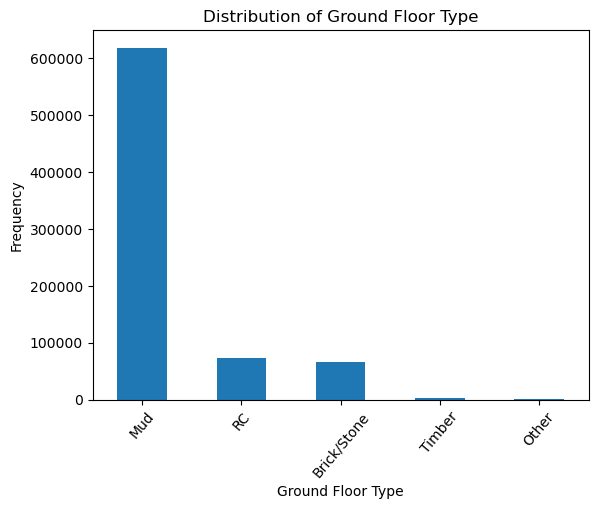

In [29]:
earthquake_data.ground_floor_type.value_counts().plot(kind="bar")
plt.xticks(rotation=50)
plt.title("Distribution of Ground Floor Type")
plt.xlabel("Ground Floor Type")
plt.ylabel("Frequency")
plt.show()

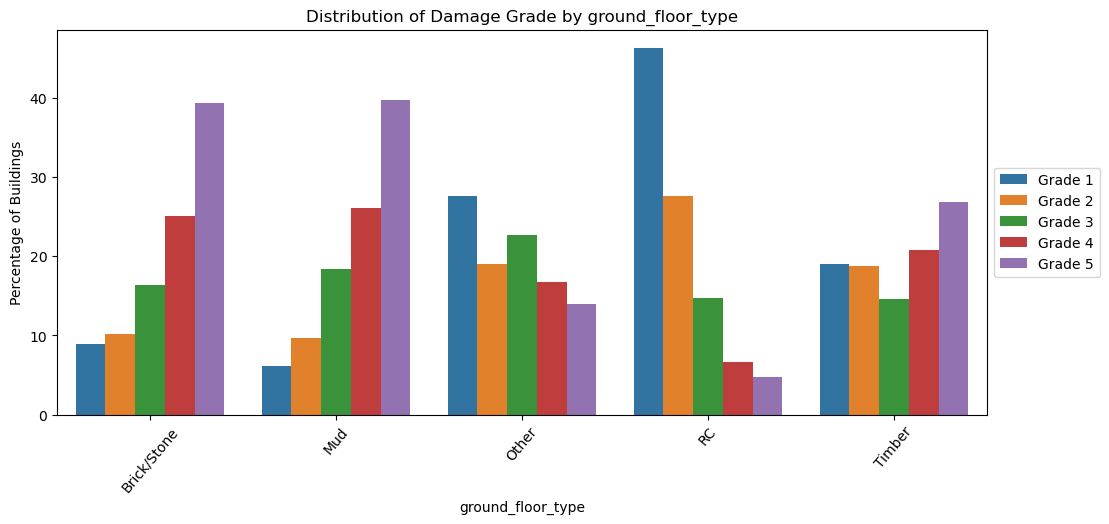

In [30]:
df_temp = earthquake_data.groupby(['ground_floor_type', 'damage_grade']).size().reset_index(name='count')
df_temp['proportion'] = df_temp.groupby('ground_floor_type')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, x='ground_floor_type',y='proportion',hue='damage_grade')
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by ground_floor_type")
plt.xlabel("ground_floor_type")
plt.ylabel("Percentage of Buildings")
plt.show()

# **Position**

In [32]:
earthquake_data.position.value_counts(normalize = True)

position
Not attached       0.793134
Attached-1 side    0.169836
Attached-2 side    0.035311
Attached-3 side    0.001719
Name: proportion, dtype: float64

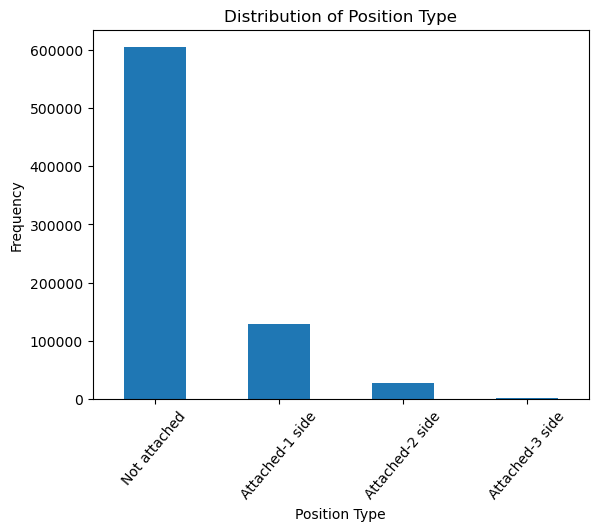

In [33]:
earthquake_data.position.value_counts().plot(kind="bar")
plt.xticks(rotation=50)
plt.title("Distribution of Position Type")
plt.xlabel("Position Type")
plt.ylabel("Frequency")
plt.show()

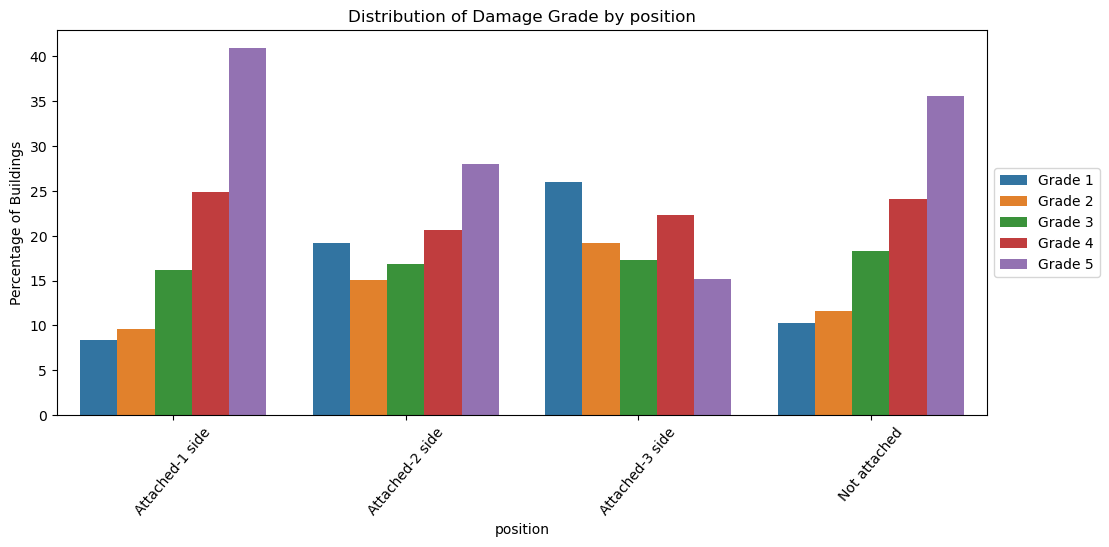

In [34]:
df_temp = earthquake_data.groupby(['position', 'damage_grade']).size().reset_index(name='count')
df_temp['proportion'] = df_temp.groupby('position')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, x='position',y='proportion',hue='damage_grade')
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by position")
plt.xlabel("position")
plt.ylabel("Percentage of Buildings")
plt.show()

# **Plan Configuration**

In [36]:
earthquake_data.plan_configuration.value_counts()

plan_configuration
Rectangular                        731246
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: count, dtype: int64

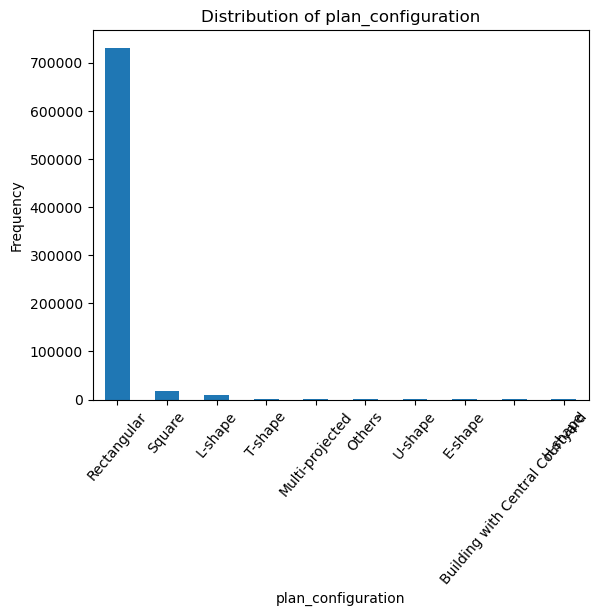

In [37]:
earthquake_data.plan_configuration.value_counts().plot(kind="bar")
plt.xticks(rotation=50)
plt.title("Distribution of plan_configuration")
plt.xlabel("plan_configuration")
plt.ylabel("Frequency")
plt.show()

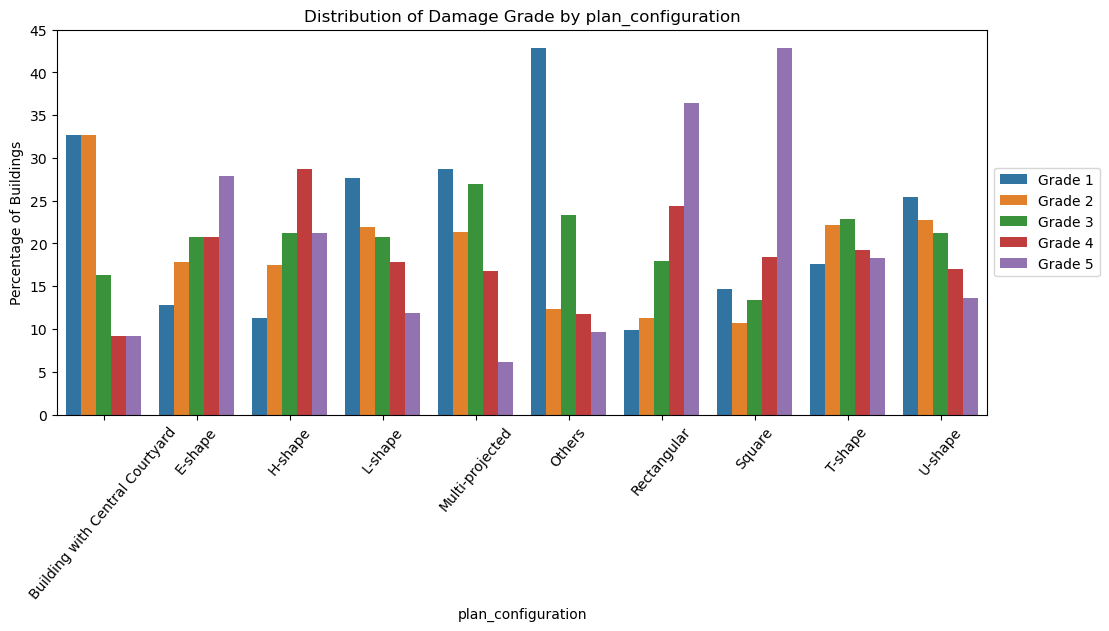

In [38]:
df_temp = earthquake_data.groupby(['plan_configuration', 'damage_grade']).size().reset_index(name='count')
df_temp['proportion'] = df_temp.groupby('plan_configuration')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, x='plan_configuration',y='proportion',hue='damage_grade')
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by plan_configuration")
plt.xlabel("plan_configuration")
plt.ylabel("Percentage of Buildings")
plt.show()

# **Radar Plot**

In [40]:
# list of binary columns
v_cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
          'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
          'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 
          'has_superstructure_timber', 'has_superstructure_bamboo', 
          'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 
          'has_superstructure_other']

In [41]:
# New Names of Binary Cols
v_names = {'has_superstructure_adobe_mud':'adobe_mud', 
           'has_superstructure_mud_mortar_stone':'mud_mortar_stone',
          'has_superstructure_stone_flag':'stone_flag', 
           'has_superstructure_cement_mortar_stone':'cement_mortar_stone',
          'has_superstructure_mud_mortar_brick':'mud_mortar_brick', 
           'has_superstructure_cement_mortar_brick':'cement_mortar_brick', 
          'has_superstructure_timber':'timber', 
           'has_superstructure_bamboo':'bamboo', 
          'has_superstructure_rc_non_engineered':'rc_non_engineered', 
           'has_superstructure_rc_engineered':'rc_engineered', 
          'has_superstructure_other':'other'}

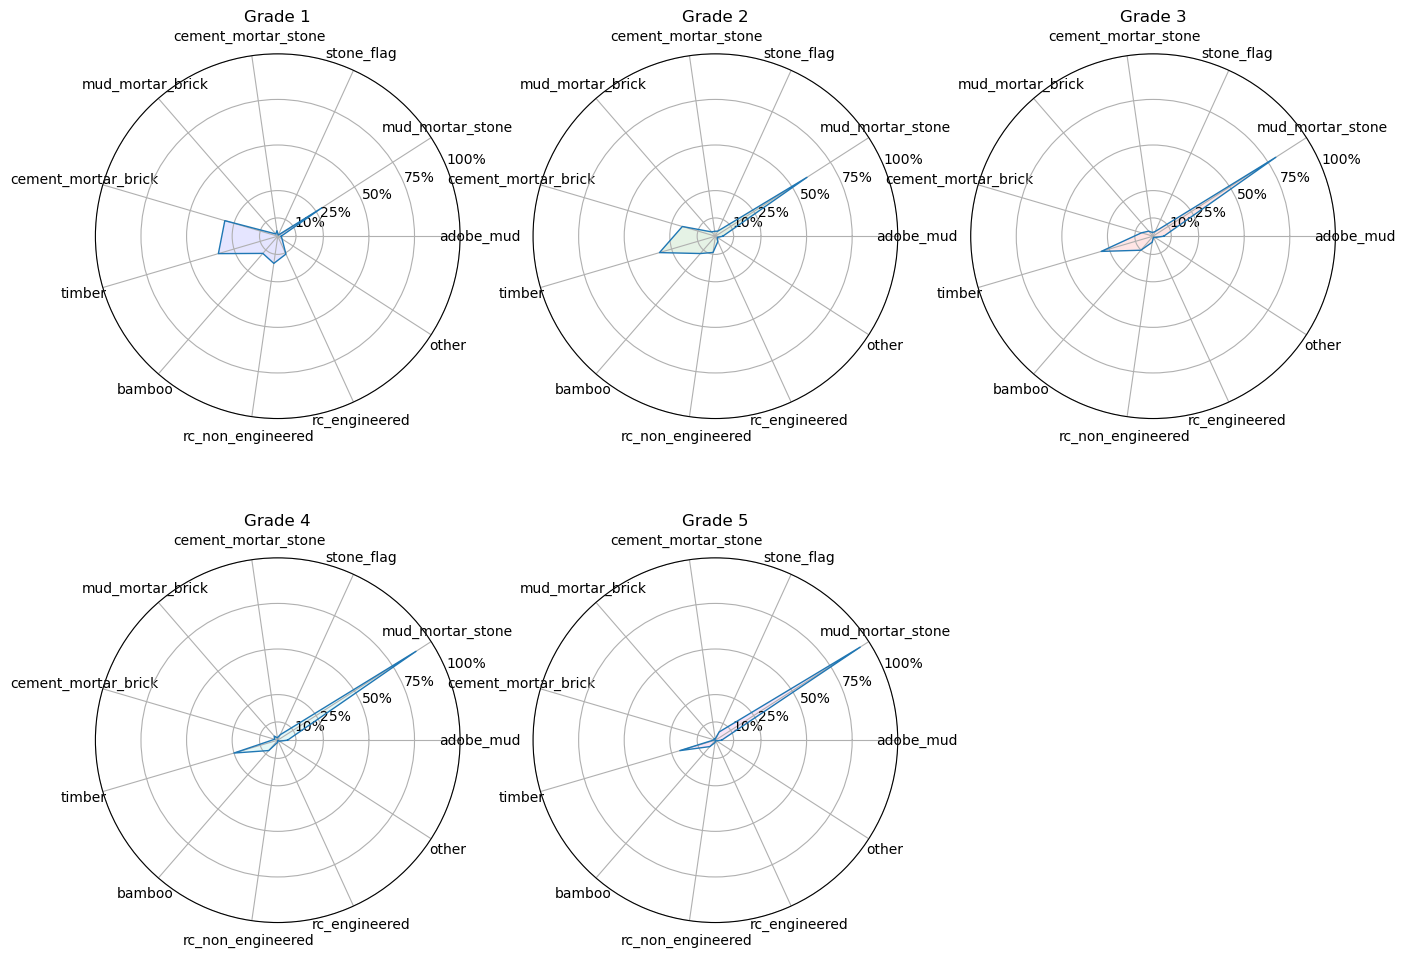

In [51]:
df_temp =earthquake_data.groupby('damage_grade')[v_cols].agg('mean').reset_index()
df_temp.rename(columns=v_names, inplace = True)
v_grades = ['Grade ' + str(x) for x in range(1,6)]
v_colour = ['b', 'g', 'r', 'c', 'm']
v_categories = list(df_temp)[1:]
v_N = len(v_categories)
v_angles = [n / float(v_N) * 2 * pi for n in range(v_N)]
v_angles += v_angles[:1]


fig, ax = plt.subplots(2,3, figsize = (16,12), subplot_kw=dict(polar=True))
plt.setp(ax, # X
         xticks = v_angles[:-1], 
         xticklabels = v_categories,
         yticks = [0.10,0.25,0.50,0.75,1.0],
         yticklabels = ["10%","25%","50%","75%","100%"],
         ylim = (0,1))
count, row, col = 0, 0, 0
for grade in v_grades:   
    values = df_temp.loc[count].drop('damage_grade').values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(v_angles, values, linewidth=1, linestyle='solid', label=grade)
    ax[row, col].fill(v_angles, values, v_colour[count], alpha=0.1)
    ax[row, col].set_title(grade)


    if count >= 2:
        row = 1
    
    if col < 2: 
        col += 1
    else:
        col = 0
    
    count += 1
fig.delaxes(ax[1,2])
del v_cols, v_names, df_temp, v_grades, v_colour,\
    v_categories, v_N, v_angles, fig, ax, count, row, col, grade

# **Features & Target Variables**

In [79]:
# Define features and target variable
X = earthquake_data.drop(['damage_grade'], axis=1)  # Features
y = earthquake_data['damage_grade']  # Target

In [81]:
# One-Hot Encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# **Splitting the dataset**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# **Logistic Regression**

In [85]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
y_pred = model.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of Logistic Regression model:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of Logistic Regression model: 0.3603356536914689

Confusion Matrix:
 [[    0     0     0     0 15923]
 [    0     0     0     0 17537]
 [    0     0     0     0 27305]
 [    0     0     0     0 36732]
 [    0     0     0     0 54922]]

Classification Report:
               precision    recall  f1-score   support

     Grade 1       0.00      0.00      0.00     15923
     Grade 2       0.00      0.00      0.00     17537
     Grade 3       0.00      0.00      0.00     27305
     Grade 4       0.00      0.00      0.00     36732
     Grade 5       0.36      1.00      0.53     54922

    accuracy                           0.36    152419
   macro avg       0.07      0.20      0.11    152419
weighted avg       0.13      0.36      0.19    152419



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [110]:
# Initialize individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

In [112]:
# Create a voting classifier using these models
voting_clf = VotingClassifier(
    estimators=[('log_reg', log_clf), ('decision_tree', dt_clf), ('knn', knn_clf)],
    voting='hard'  # or 'soft' for probability-based voting
)

In [114]:
# Fit the voting classifier to the training data
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [116]:
# Predict and evaluate
y_pred = voting_clf.predict(X_test)
print("Ensemble Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Ensemble Voting Classifier Accuracy: 0.7014676647924472


In [ ]:
# Individual model performance for comparison
for clf in (log_clf, dt_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred_individual = clf.predict(X_test)
    print(clf.__class__.__name__, "Accuracy:", accuracy_score(y_test, y_pred_individual))

LogisticRegression Accuracy: 0.3603356536914689
DecisionTreeClassifier Accuracy: 0.8721484854250454
